# Derive, modify and plot the stream network

The stream network is a subset of the flow network. Often, this subset is defined as having a minimum upstream area. The idea is that if upstream area exceeds a critical value than flow becomes channelized in stream networks.

`StreamObject` stores stream networks. Here we simply assume that streams initiate at upstream areas greater than 1000 pixels.

In [1]:
import topotoolbox as tt3
import matplotlib.pyplot as plt

dem = tt3.load_dem('bigtujunga')
fd  = tt3.FlowObject(dem);
s   = tt3.StreamObject(fd,threshold=1000,units='pixels')

## Plot the stream network

The stream network can be plotted using the `plot` method on `StreamObject`.

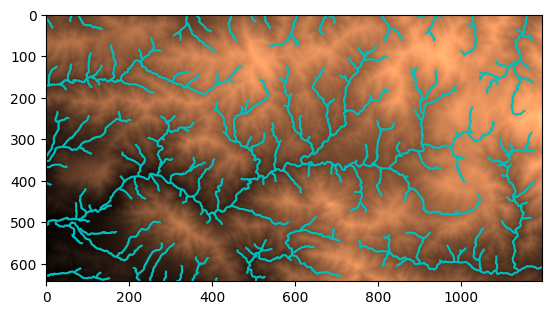

In [3]:
fig, ax = plt.subplots()
dem.plot(ax,cmap="copper")
s.plot(ax=ax,color='c')
plt.show()

## Modify the stream network

Frequently, we might be only interested in parts of the river network. `StreamObject` has a number of methods that can modify the geometry of the network. For example, we may be interested in only the largest basin.

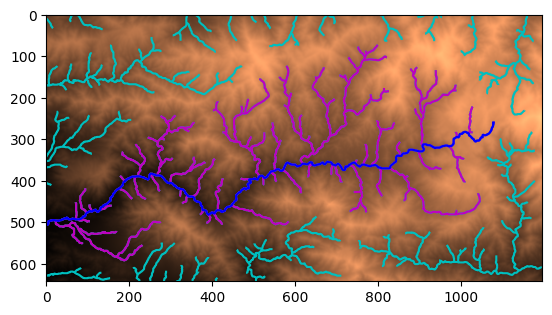

In [8]:
s2 = s.klargestconncomps(1)
st = s2.trunk()
fig,ax = plt.subplots()
dem.plot(ax=ax,cmap="copper")
s.plot(ax=ax, color='c')
s2.plot(ax=ax,color='m')
st.plot(ax=ax, color='b')
plt.show()

## Plot the longitudinal stream profile

Applications in tectonic geomorphology are often interested in longitudinal profiles and features such as knickpoints. Visual inspection of the profile provides a first clue for these features.

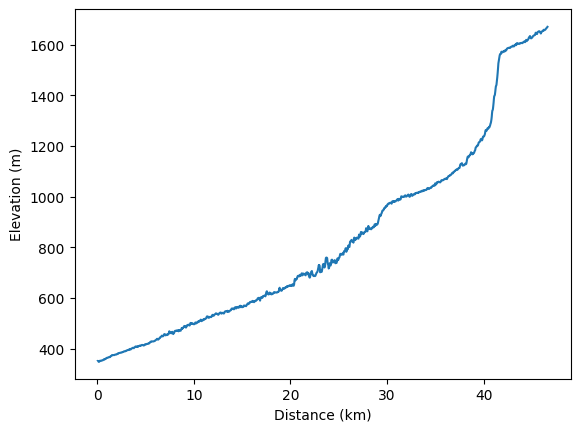

In [9]:
fig = plt.figure()
ax = plt.axes(xlabel="Distance (km)", ylabel="Elevation (m)")
st.plotdz(dem, ax=ax, dunit='km')
ax.autoscale_view()